##Load the cleaned Data

In [2]:
import pandas as pd

car_details = pd.read_csv('/content/Cardetails.csv')
sales = pd.read_csv('/content/Sales.csv')
dealership_info = pd.read_csv('/content/Dealershipinfo.csv')

df = sales.merge(car_details, on = 'Car_id').merge(dealership_info, on = 'Car_id')


In [3]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Price ($),Company,Model,Engine,Transmission,Color,Body Style,Dealer_Name,Dealer_No,Phone,Dealer_Region
0,1,01-02-2022,Geraldine,Male,13500,26000,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,SUV,Buddy Storbeck's Diesel Service Inc,06457-3834,8264678,Middletown
1,2,01-02-2022,Gia,Male,1480000,19000,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,SUV,C & M Motors Inc,60504-7114,6848189,Aurora
2,3,01-02-2022,Gianna,Male,1035000,31500,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,Passenger,Capitol KIA,38701-8047,7298798,Greenville
3,4,01-02-2022,Giselle,Male,13500,14000,Toyota,Celica,Overhead Camshaft,Manual,Pale White,SUV,Chrysler of Tri-Cities,99301-3882,6257557,Pasco
4,5,01-02-2022,Grace,Male,1465000,24500,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,Hatchback,Chrysler Plymouth,53546-9427,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23900,23902,31-12-2023,Martin,Male,13500,12000,Plymouth,Voyager,Overhead Camshaft,Manual,Red,Passenger,C & M Motors Inc,60504-7114,8583598,Pasco
23901,23903,31-12-2023,Jimmy,Female,900000,16000,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,Hardtop,Ryder Truck Rental and Leasing,06457-3834,7914229,Middletown
23902,23904,31-12-2023,Emma,Male,705000,21000,BMW,328i,Overhead Camshaft,Manual,Red,Sedan,Chrysler of Tri-Cities,99301-3882,7659127,Scottsdale
23903,23905,31-12-2023,Victoire,Male,13500,31000,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,Passenger,Chrysler Plymouth,53546-9427,6030764,Austin


# Visulization with Matplotlib


In [4]:
import matplotlib.pyplot as plt

## 1. Total Sales by year

### Extract year from Date

In [5]:
df['Year'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.year

### Group by year and sum the prices

In [6]:
Sales_in_year = df.groupby('Year')['Price ($)'].sum()

In [7]:
Sales_in_year

Year
2022    300295345
2023    371185120
Name: Price ($), dtype: int64

### Plot

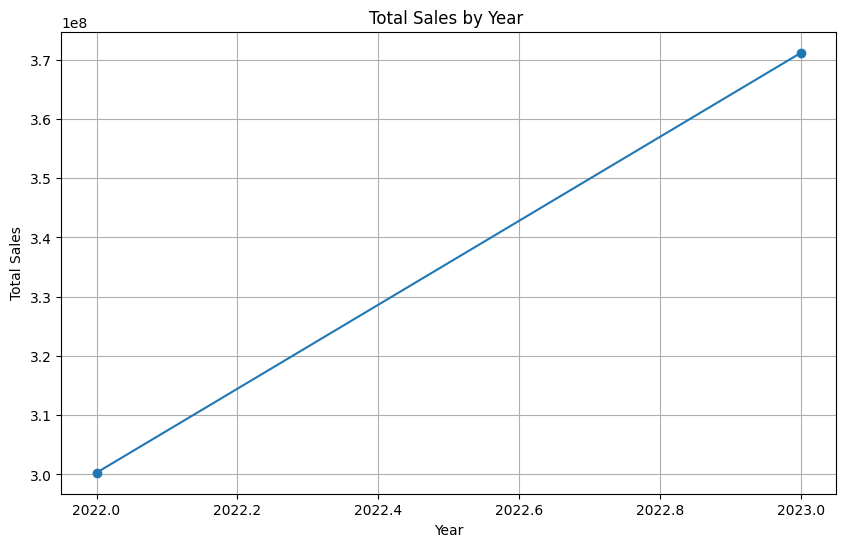

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(Sales_in_year.index, Sales_in_year.values, marker='o')
plt.title('Total Sales by Year ')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## 2. Total Sales by Month and year

<Figure size 1200x800 with 0 Axes>

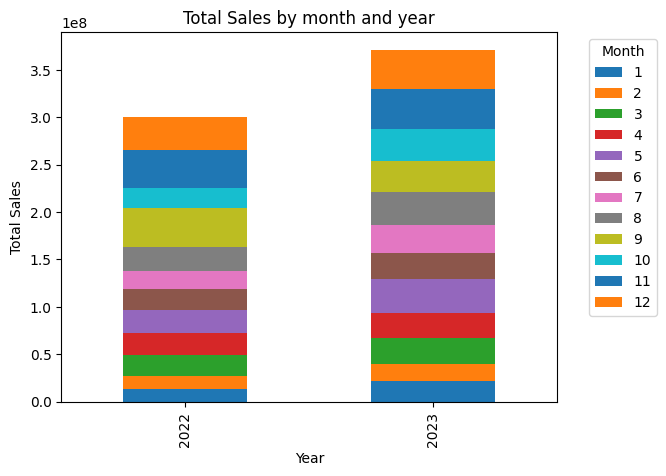

In [9]:
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month

Sales_by_month = df.groupby(['Year','Month'])['Price ($)'].sum().unstack()

plt.figure(figsize=(12, 8))
Sales_by_month.plot(kind='bar', stacked=True)
plt.title('Total Sales by month and year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3. Total Sales by Country

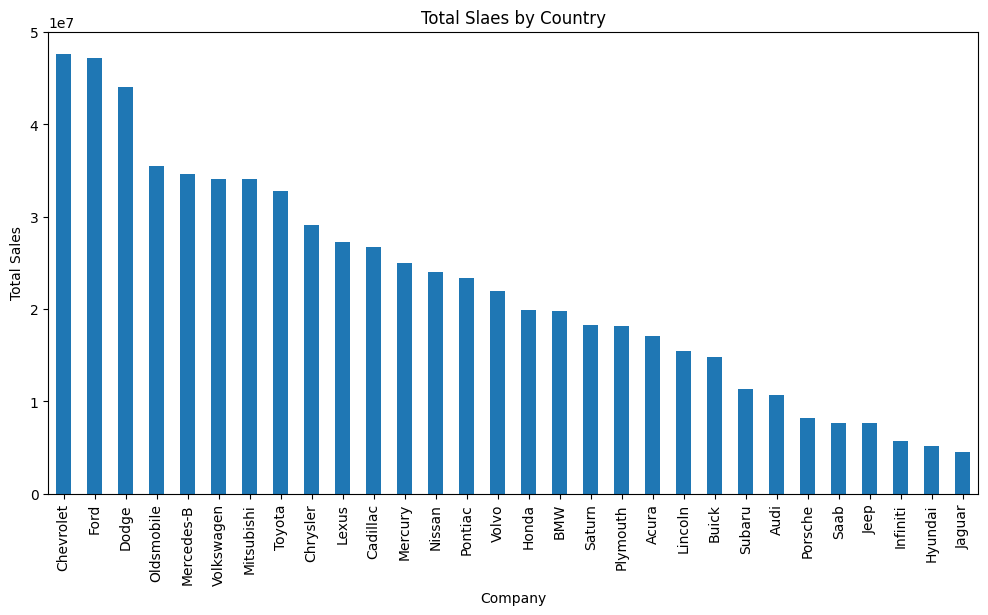

In [10]:
Sales_by_Company = df.groupby('Company')['Price ($)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
Sales_by_Company.plot(kind='bar')
plt.title('Total Slaes by Country')
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.show()

# Visulization with Seaborn

## 4. Average Sales Price by Car Model

<ipython-input-11-235bea1cc3f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Model_Avg_Price.values, y=Model_Avg_Price.index, palette='viridis')


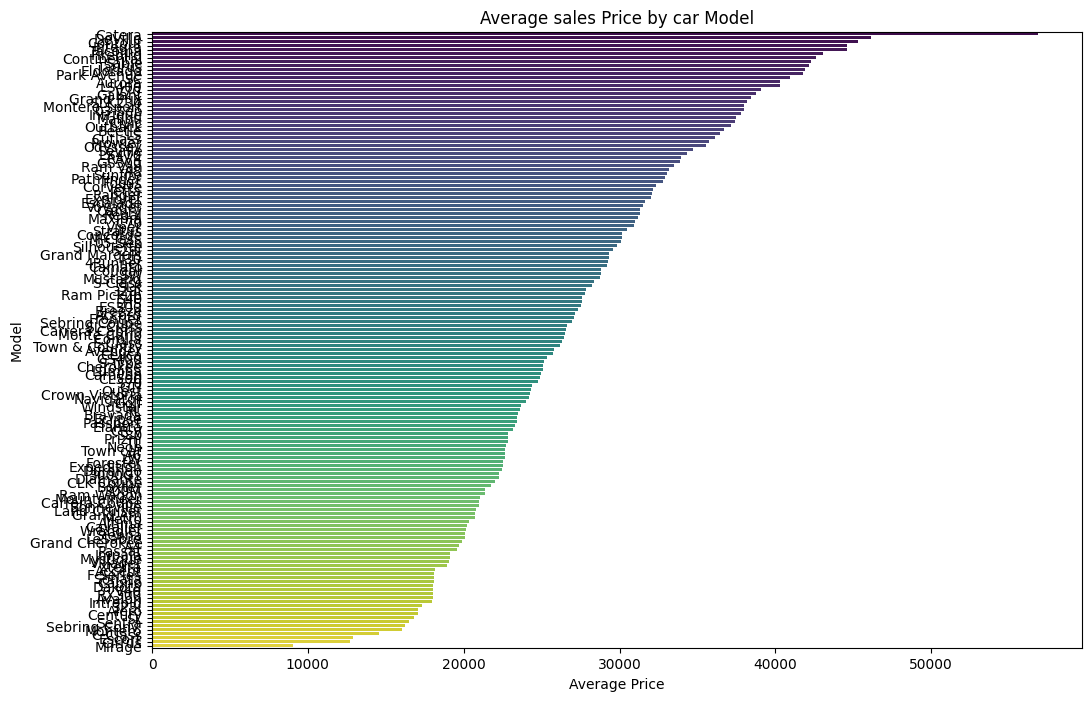

In [11]:
import seaborn as sns

Model_Avg_Price = df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=Model_Avg_Price.values, y=Model_Avg_Price.index, palette='viridis')
plt.title('Average sales Price by car Model')
plt.xlabel('Average Price')
plt.ylabel('Model')
plt.show()

## 5. Total Number of Cars Sold by Engine Type

<ipython-input-12-5ec6ee56cf92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Sales_by_Engine.index, y=Sales_by_Engine.values, palette='plasma')


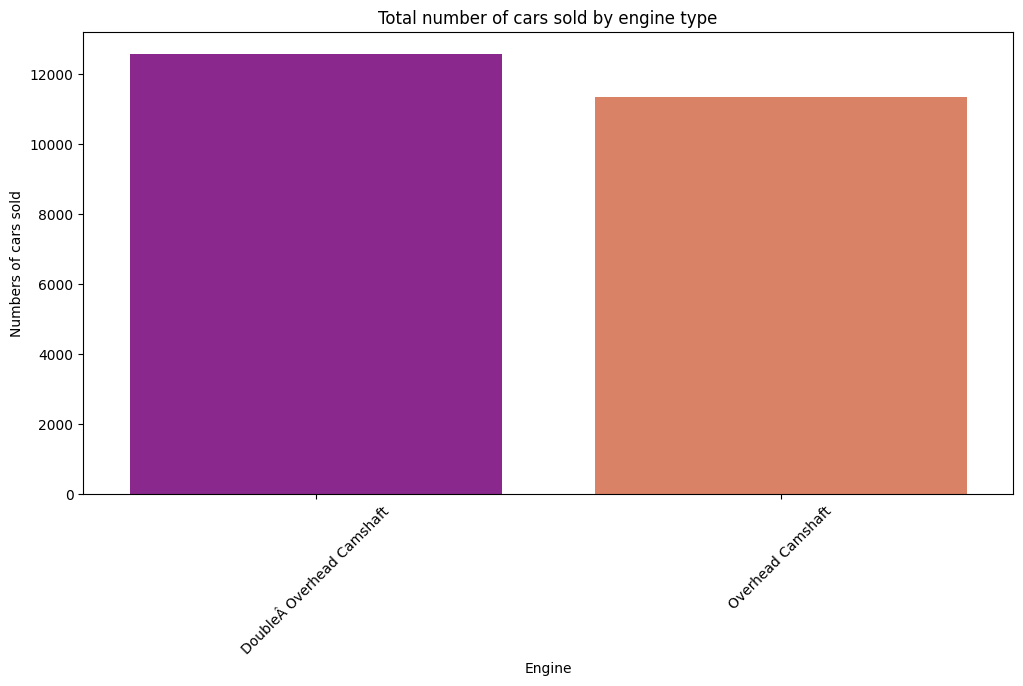

In [12]:
Sales_by_Engine = df['Engine'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=Sales_by_Engine.index, y=Sales_by_Engine.values, palette='plasma')
plt.title('Total number of cars sold by engine type')
plt.xlabel("Engine")
plt.ylabel('Numbers of cars sold')
plt.xticks(rotation=45)
plt.show()

# Visualization with Plotly

## Total Sales by Dealer

In [13]:
import plotly.express as px

Sales_by_Dealer = df.groupby('Dealer_Name')['Price ($)'].sum().reset_index()

fig = px.bar(Sales_by_Dealer, x='Dealer_Name' , y='Price ($)', title="Total Sales by Dealer", labels={'Price ($)':'Total Sales','Dealer_Name': 'Delaer Name'})
fig.show()

## Sales performance by Dealer Region

In [14]:
Region_Sales = df.groupby('Dealer_Region')['Price ($)'].sum().reset_index()

fig = px.bar(Region_Sales, x='Dealer_Region', y='Price ($)', title='Sales Performance by Dealer Region', labels={'Price ($)': 'Total Sales', 'Dealer_Region': 'Dealer Region'})
fig.show()

## Sales and Profit by transmission type

In [16]:
transmission_performance =df.groupby('Transmission').agg({'Price ($)': 'sum'}).reset_index()

fig = px.bar(transmission_performance, x='Transmission',y=['Price ($)'], title='Sales and profit by transmission type', labels={'value':'Amount', 'transmission':'Transmission Type'})
fig.show()

In [19]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.4 MB/s eta 0:00:00


In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div(children = [
    html.H1(children='Car Sales Dashboard'),

    html.Div(children=''' Analysis of Car sales data'''),
    dcc.Graph(id='Sales_in_year'),
    dcc.Graph(id='Sales_by_Company'),
    dcc.Graph(id='Model_Avg_Price'),
    dcc.Graph(id='Sales_by_Engine'),
    dcc.Graph(id='Sales_by_Dealer'),
    dcc.Graph(id='Region_Sales'),
    dcc.Graph(id='transmission_performance'),
])

@app.callback(
    [Output('Sales_in_year', 'figure'),
     Output('Sales_by_Company', 'figure'),
     Output('Model_Avg_Price', 'figure'),
     Output('Sales_by_Engine', 'figure'),
     Output('Sales_by_Dealer', 'figure'),
     Output('Region_Sales', 'figure'),
     Output('transmission_performance', 'figure'),
    ]
)
def update_graph():
  yearly_sales = df.groupby('Year')['Price ($)'].sum().reset_index()
  fig1 = px.line(yearly_sales, x='Year', y='Price ($)', title='Total Sales by Year',labels={'Price ($)':'Total Sales'})

  company_sales = df.groupby('company')['Price ($)'].sum().reset_index()
  fig2 = px.bar(company_sales, x='company', y='Price ($)', title='Total Sales by Company',labels={'Price ($)':'Total Sales'})

  model_avg_sales = df.groupby('Model')['Price ($)'].mean().reset_index()
  fig3 = px.bar(model_avg_sales, x='Model', y='Price ($)', title='Average sales price by car model',labels={'Price ($)':'Total Sales'})

  engine_sales = df.groupby['Engine'].value_counts.reset_index()
  engine_sales.columns = ['Engine', 'count']
  fig4 = px.bar(engine_sales, x='Engine', y='count', title='Total numbers of cars sold by engine',labels={'count':'Number od cars sold'})

  dealer_sales = df.groupby('Dealer_Name')['Price ($)'].sum().reset_index()
  fig5 = px.bar(dealer_sales, x='Dealer_Name', y='Price ($)', title='Total sales by dealer',labels={'Price ($)':'Total Sales'})

  region_sales = df.groupby('Dealer_region')['price'].sum().reset_index()
  fig6 = px.bar(region_sales, x='Dealer_region', y='Price ($)', title='Sales Performance by Dealer Region', labels={'price': 'Total Sales'})

  transmission_performance = df.groupby('transmission').agg({'price': 'sum'}).reset_index()
  fig7 = px.bar(transmission_performance, x='transmission', y=['price'], title='Sales and Profit by Transmission Type', labels={'value': 'Amount'})

  return fig1, fig2, fig3, fig4, fig5, fig6, fig7

if __name__ == '__main__':
  app.run_server(debug=True)

<IPython.core.display.Javascript object>